# Otto Group Product Classification Project

Otto Group is one of the world’s biggest e-commerce companies selling millions of products worldwide every day.

Dataset Link:  https://www.kaggle.com/c/otto-group-product-classification-challenge

In this Project, we have 93 anonimized features describing products of Otto Group. 
* There are nine categories for all products. The task is to classify products into correct categories

* The training set is comprised of 61878 labeled products (Class_1, Class_2, ..., Class_9) and have 93 numerical features ranging from 0 to 352. Features represent counts of different events

* Task is to predict 144368 products of the testing dataset

In this notebook, we will present our contribution to solve the above mentioned challenge. 

First the data will be presented, followed by exploratory data analysis and finally describe the classification modelling

** Section 1: Data and Libraries Import**

** Section 2: Exploratory Data Analysis**

** Section 3: Feature Selection**

** Section 4: Machine Learning Modelling**

## *SECTION 1*
### 1. Libraries and Data Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, DataFrame, get_dummies, Series
from sklearn.preprocessing import LabelEncoder
from sklearn.calibration import CalibratedClassifierCV
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
%matplotlib inline

### 1.1. Data Import

In [2]:
data = pd.read_csv('otto/otto.csv') #Training Data
#test = pd.read_csv('otto/test_otto.csv') #Test Data

In [3]:
print('Training dataset has %d rows and %d columns' % data.shape)
#print('Testing dataset has %d rows and %d columns' % test.shape)
data=data.rename(columns={"target": "Pclass"})
data.head(4)

Training dataset has 61878 rows and 95 columns


,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,Pclass
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1


### 1.2. Checking Null Values 

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
a=pd.DataFrame(data.isnull().sum())
a.transpose()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,feat_48,feat_49,feat_50,feat_51,feat_52,feat_53,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,Pclass
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


There are no missing values for any of the 93 features

## *SECTION 2*
### Exploratory Data Analysis

### 2.1.  Count Plot of Target - 09 Product Categories

From count plot, it is seen that the target classes are not equal. Class imbalance may pose a problem in doing classification and thus should be taken into account by using suitable evaluation metric

,Class_2,Class_6,Class_8,Class_3,Class_9,Class_7,Class_5,Class_4,Class_1
Pclass,16122,14135,8464,8004,4955,2839,2739,2691,1929


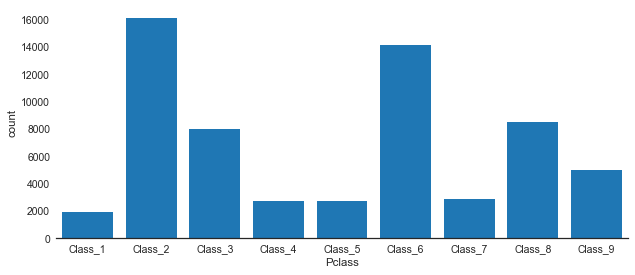

In [5]:
sns.set_style('white')
sns.set_context("paper", font_scale=1.3)
fig = plt.figure(figsize=(9,4)) 
sns.countplot(x='Pclass',data=data,color='#1f77b4', saturation=1) 
plt.tight_layout() 
sns.despine(left=True) 
a=pd.DataFrame(data.Pclass.value_counts()) 
a.transpose()

### 2.2. Distribution Percentage of Target Classes

* Class_2 & Class_6 are most frequent in the data, representing 26% and 23% of the total labels, respectively. 
* Thus, class imbalance should be taken into account during modeling.

In [6]:
class_dist = data.groupby('Pclass').agg({'Pclass':'count'}).apply(lambda x: 100 * x / float(x.sum())).sort_values(by='Pclass', ascending=False)
class_dist['Pclass'] =  pd.Series(["{0:.2f}%".format(val) for val in class_dist['Pclass']], index = class_dist.index)
class_dist.transpose()

Pclass,Class_2,Class_6,Class_8,Class_3,Class_9,Class_7,Class_5,Class_4,Class_1
Pclass,26.05%,22.84%,13.68%,12.94%,8.01%,4.59%,4.43%,4.35%,3.12%


### 2.3. Heatmap to check Correlation between Features

It is seen that some features are highly correlated and thus can be removed during modelling to reduce data dimension

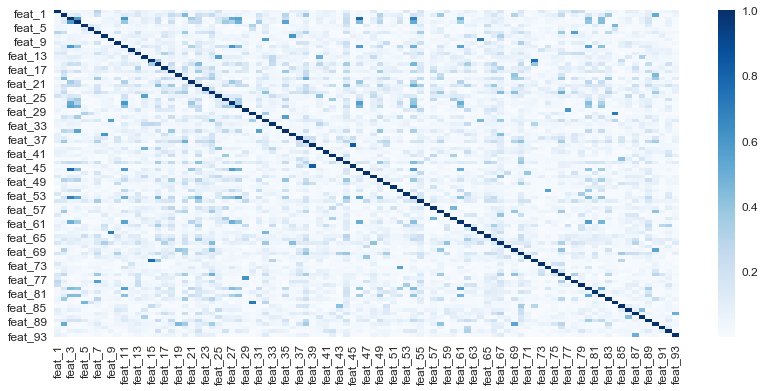

In [7]:
sns.set_style('white')
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(14,6))
data_corr=data.iloc[:,1:-1]
data_corr=data_corr.corr().abs();
sns.heatmap(data_corr,cmap='Blues');

### 2.4. Maximum Positive & Negative Correlation between Features

In [8]:
# Check which features have maximum correlation value
# Matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
oc = (data_corr.where(np.triu(np.ones(data_corr.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))

print("Top 05 highest positive correlation coefficients between features")
max_corr_pos = oc.head(5)
display(max_corr_pos)
print("  ")
print("Top 5 highest negative correlation coefficients between features")
max_corr_neg = oc.tail(5)
display(max_corr_neg)

Top 05 highest positive correlation coefficients between features


feat_39  feat_45   0.82
feat_3   feat_46   0.78
feat_15  feat_72   0.76
feat_30  feat_84   0.72
feat_9   feat_64   0.70
dtype: float64

  
Top 5 highest negative correlation coefficients between features


feat_21  feat_77   0.00
feat_91  feat_93   0.00
feat_8   feat_10   0.00
feat_32  feat_85   0.00
feat_4   feat_19   0.00
dtype: float64

### 2.5.Cumulative Features Weights Visualisation

It is seen that cumulative weight of some features is large compared to others

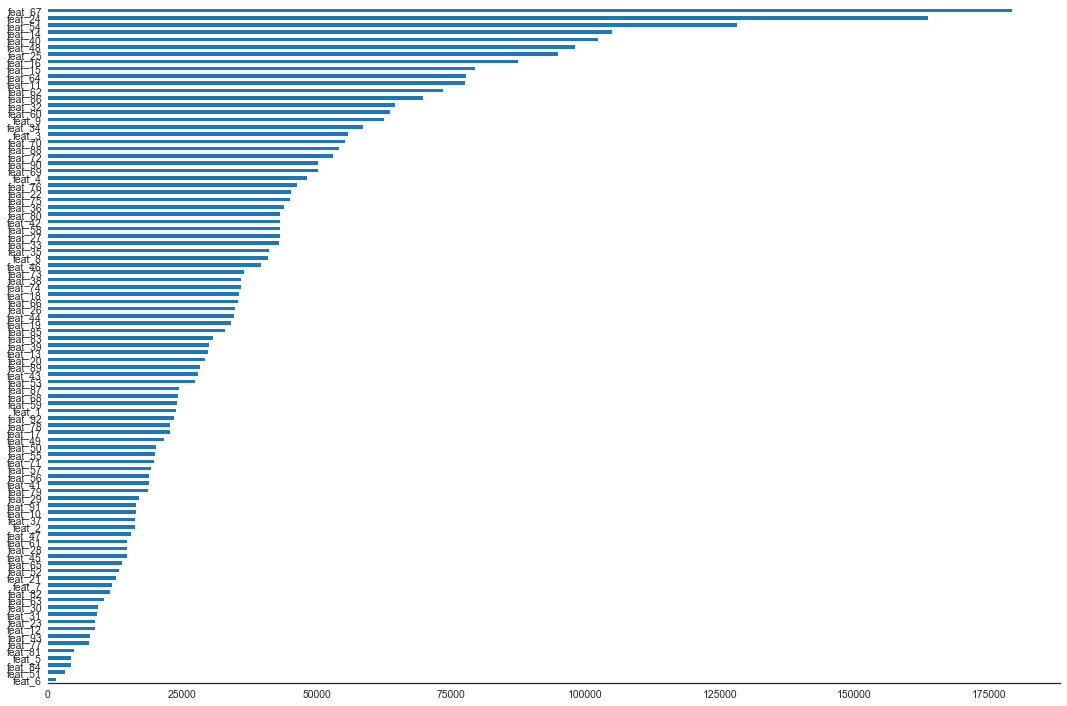

In [9]:
sns.set_style('white')
sns.set_context("paper", font_scale=1.3)
wt = data.sum()
wt.drop(['Pclass','id']).sort_values().plot(kind='barh',color='#1f77b4', figsize=(15,10))
sns.despine(left=True)
#plt.grid()
plt.tight_layout()

### 2.6. Principal Component Analysis
We note that 80% of the variance can be explained by the first 27 principal components. 

In [10]:
data1 = data.drop('Pclass', axis=1)
data1 = data1.drop('id', axis=1)
pca = PCA()
pca.fit(data1)
exp_var_ratio = pca.explained_variance_ratio_
cumulative_var_ratio = np.zeros(exp_var_ratio.shape)
for i in range(len(cumulative_var_ratio)):
    cumulative_var_ratio[i] = np.sum(exp_var_ratio[0:i+1])
exp_var_ratio = np.concatenate((exp_var_ratio.reshape(1,len(exp_var_ratio)), cumulative_var_ratio.reshape(1,len(cumulative_var_ratio))), axis=0)
pd.set_option('display.max_columns', 100)
display(pd.DataFrame(exp_var_ratio, columns = ['PC_'+str(i+1) for i in range(data1.shape[1])], index = ['Proportion of variance', 'Cumulative proportion']))

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19,PC_20,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28,PC_29,PC_30,PC_31,PC_32,PC_33,PC_34,PC_35,PC_36,PC_37,PC_38,PC_39,PC_40,PC_41,PC_42,PC_43,PC_44,PC_45,PC_46,PC_47,PC_48,PC_49,PC_50,PC_51,PC_52,PC_53,PC_54,PC_55,PC_56,PC_57,PC_58,PC_59,PC_60,PC_61,PC_62,PC_63,PC_64,PC_65,PC_66,PC_67,PC_68,PC_69,PC_70,PC_71,PC_72,PC_73,PC_74,PC_75,PC_76,PC_77,PC_78,PC_79,PC_80,PC_81,PC_82,PC_83,PC_84,PC_85,PC_86,PC_87,PC_88,PC_89,PC_90,PC_91,PC_92,PC_93
Proportion of variance,0.12,0.09,0.06,0.06,0.04,0.04,0.03,0.03,0.03,0.03,0.03,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Cumulative proportion,0.12,0.20,0.27,0.33,0.37,0.41,0.45,0.48,0.51,0.54,0.56,0.58,0.61,0.63,0.64,0.66,0.68,0.70,0.71,0.73,0.74,0.75,0.76,0.77,0.78,0.79,0.80,0.81,0.82,0.82,0.83,0.84,0.85,0.85,0.86,0.87,0.87,0.88,0.88,0.89,0.89,0.90,0.90,0.91,0.91,0.92,0.92,0.92,0.93,0.93,0.94,0.94,0.94,0.94,0.95,0.95,0.95,0.96,0.96,0.96,0.96,0.96,0.97,0.97,0.97,0.97,0.97,0.98,0.98,0.98,0.98,0.98,0.98,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


## *SECTION 3*
###  Feature Selection

In [11]:
#Seperate features and target
cols = data.columns
X = data[cols[1:-1]] #Excluding ID and Class column
y = data[cols[-1]]
y = LabelEncoder().fit_transform(data.Pclass.values)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.20, random_state=36)

### 3.1. Tree Based Feature Selection
Select important features using Random forest and Extra Trees Classifier Model. Tree-based strategies used by random forests and Extra trees naturally ranks features by how well they improve the purity of the node

Taking intersection of top important features by both models

#### 3.1.1. Random Forest

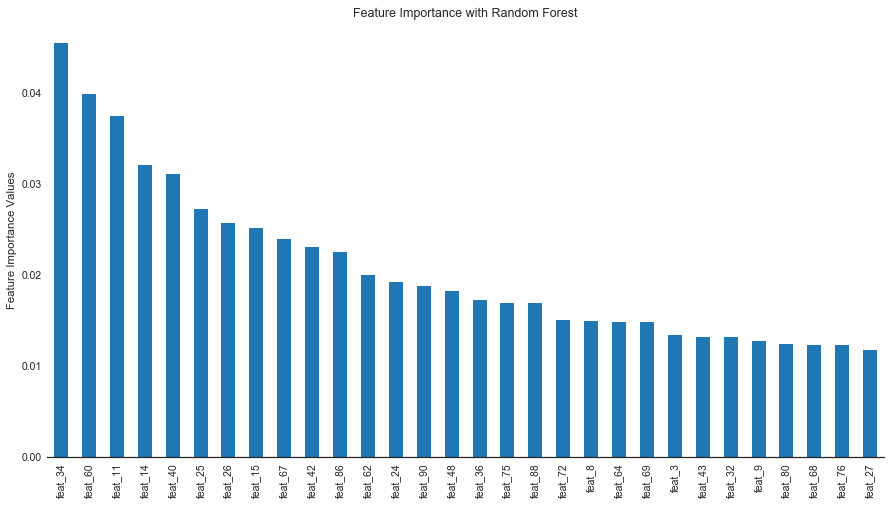

In [12]:
RF = RandomForestClassifier(n_estimators=200)
RF.fit(X_train, y_train)
feat_imp = Series(RF.feature_importances_, index=X_train.columns.values).sort_values(ascending=False)
feat_imp[:30].plot(kind='bar', color='#1f77b4', title='Feature Importance with Random Forest', figsize=(15,8))
plt.ylabel('Feature Importance Values')
sns.despine(left=True)
imp_feats_RF = list(feat_imp[:55].index) # Top 50 important features by Random Forest
plt.show()

#### 3.1.2. Extra Trees Classifier

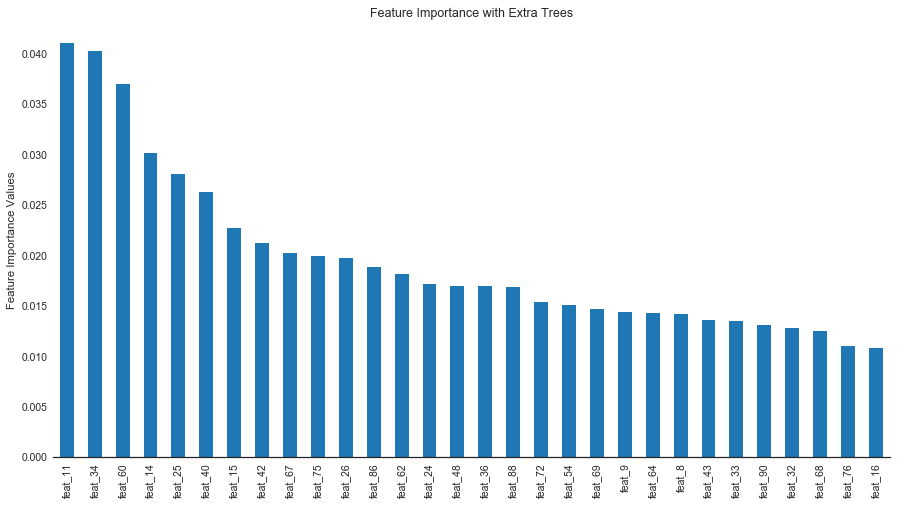

In [13]:
ET = ExtraTreesClassifier(n_estimators=200)
ET.fit(X_train, y_train)
feat_imp = Series(ET.feature_importances_, index=X_train.columns.values).sort_values(ascending=False)
feat_imp[:30].plot(kind='bar', color='#1f77b4', title='Feature Importance with Extra Trees', figsize=(15,8))
plt.ylabel('Feature Importance Values')
sns.despine(left=True)
imp_feats_ET = list(feat_imp[:55].index) # Top 50 important features by Extra Trees 
plt.savefig('Fig1.png', bbox_inches='tight', dpi=400) 
plt.show()

#### 3.2. Finding Intersection of Common Features Identified by both Models

In [14]:
# Find Intersection of Common Features by Random Forest and Extra Trees Model
def intersection(lst1, lst2):
    imp = [value for value in lst1 if value in lst2]
    return imp

imp=intersection(imp_feats_RF,imp_feats_ET)
for x in imp:
    print(x, end=' ')

feat_34 feat_60 feat_11 feat_14 feat_40 feat_25 feat_26 feat_15 feat_67 feat_42 feat_86 feat_62 feat_24 feat_90 feat_48 feat_36 feat_75 feat_88 feat_72 feat_8 feat_64 feat_69 feat_3 feat_43 feat_32 feat_9 feat_80 feat_68 feat_76 feat_39 feat_4 feat_33 feat_16 feat_54 feat_53 feat_70 feat_57 feat_85 feat_59 feat_30 feat_17 feat_71 feat_46 feat_50 feat_38 feat_1 feat_41 feat_20 

In [16]:
len(imp)

48

In [17]:
# Subsetting Data based on important Features
# X = X[imp_feats]
#Selected features Subset for training and testing
X_train1 = X_train[imp] 
X_test1 = X_test[imp]

## *Section 4*
### Predictive Modeling: Machine Learning

The objective is to build a predictive model which is able to distinguish between nine product categories.

Evaluation metric: The evaluation metric uses the multi-class logarithmic loss (logloss). This evaluation metric is being used to penalize heavily in case a wrong prediction comes up. Each product has been defined with one true category.

Since the dataset is not balanced, thus accuracy alone is not a good metric for model selection. Thus we consider following:

1. Log Loss/Cross-entropy loss: Incorporates the idea of probabilistic confidence, a perfect model would have a log loss of 0

1. F1 Score: Harmonic Mean of recall and Precision

### Principal Component Analysis

In [ ]:
from data import *
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Note: Total number of features is 93.
pca = PCA(n_components = 93)
pca.fit(data1)
variance_ratio = pca.explained_variance_ratio_

def get_explained_variance(n_components):
    return sum(variance_ratio[0:n_components])

def print_pca_explained_variance(n_components):
   print("The variance explained by {0} components is {1}.\n"
           .format(n_components, get_explained_variance(n_components)))

print_pca_explained_variance(93)
print_pca_explained_variance(92)
print_pca_explained_variance(90)
print_pca_explained_variance(50)
print_pca_explained_variance(30)
print_pca_explained_variance(10)
print_pca_explained_variance(5)


X = range(0, 93)
Y = [get_explained_variance(x) for x in X]

plt.plot(X, Y)
plt.axis([0, 93, 0, 1])
plt.ylabel('Proportion of Variance (beta k)')
plt.xlabel('Number of Features')
plt.show()


## XGBoost Model
In this this notebook we will use xgboost model, which plays an important role with respect to computational time and accuracy in many winning solutions of kaggle competitions. 

### 4.1. XGBoost Classifier with Full Features

In [18]:
xgb_clf = XGBClassifier(n_estimators=150,n_jobs=-1)
xgb_clf.fit(X_train,y_train)
pred1_xgb = xgb_clf.predict(X_test)
pred2_xgb = xgb_clf.predict_proba(X_test)

Performance Metrics of XGB Model with full Features

In [20]:
print ('Accuracy XGBoost:', accuracy_score(y_test, pred1_xgb))
print ('Log Loss XGBoost:', log_loss(y_test, pred2_xgb))
from sklearn.metrics import classification_report
print(classification_report(y_test,pred1_xgb))

Accuracy XGBoost: 0.7786037491919845
Log Loss XGBoost: 0.6144325749424497
             precision    recall  f1-score   support

          0       0.64      0.37      0.47       386
          1       0.67      0.87      0.76      3224
          2       0.56      0.39      0.46      1601
          3       0.82      0.37      0.51       538
          4       0.97      0.96      0.97       548
          5       0.93      0.93      0.93      2827
          6       0.76      0.59      0.66       568
          7       0.87      0.91      0.89      1693
          8       0.83      0.84      0.84       991

avg / total       0.78      0.78      0.77     12376



### 4.2. XGBoost Classifier with Selected Features

In [21]:
xgb_clf = XGBClassifier(n_estimators=150,n_jobs=-1)
xgb_clf.fit(X_train1,y_train)
pred1_xgb = xgb_clf.predict(X_test1)
pred2_xgb = xgb_clf.predict_proba(X_test1)

Performance Metrics of XGB Model with Selected Features

In [22]:
print ('Accuracy Random Forest:', accuracy_score(y_test, pred1_xgb))
print ('Log Loss Random Forest:', log_loss(y_test, pred2_xgb))
print(classification_report(y_test,pred1_xgb))

Accuracy Random Forest: 0.7629282482223658
Log Loss Random Forest: 0.6478961426900933
             precision    recall  f1-score   support

          0       0.55      0.31      0.39       386
          1       0.66      0.86      0.75      3224
          2       0.55      0.37      0.44      1601
          3       0.82      0.36      0.50       538
          4       0.97      0.95      0.96       548
          5       0.92      0.93      0.93      2827
          6       0.71      0.55      0.62       568
          7       0.83      0.89      0.86      1693
          8       0.80      0.80      0.80       991

avg / total       0.76      0.76      0.75     12376



In [23]:
print('Number of features in original dataset :',X_test.shape[1])
print('Selected features using tree based model:',X_test1.shape[1])
print('Percentage Reduction in Features Size',
     abs(((float(X_test1.shape[1])-X_test.shape[1])/X_test.shape[1]))*100)

Number of features in original dataset : 93
Selected features using tree based model: 48
Percentage Reduction in Features Size 48.38709677419355


### 4.3. PCA Components that explain 90% of variance of data

#### The compnents would be used as inputs to XGBoost Model

In [24]:
from sklearn.decomposition import PCA
pca= PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [27]:
k=0
total= sum(pca.explained_variance_)
current_sum=0
while current_sum/total <= 0.90:
    current_sum += pca.explained_variance_[k]
    k+=1
print('Number of PCA Components that explain 90% varoance are',k)

Number of PCA Components that explain 90% varoance are 43


In [28]:
pca=PCA(n_components=k,whiten=True)
train_transform_data= pca.fit_transform(X_train)
print(train_transform_data.shape)

test_transform_data=pca.transform(X_test)
test_transform_data.shape
xgb_clf = XGBClassifier(n_estimators=150,n_jobs=-1)
xgb_clf.fit(train_transform_data,y_train)
pred1_xgb = xgb_clf.predict(test_transform_data)
pred2_xgb = xgb_clf.predict_proba(test_transform_data)

(49502, 43)


In [29]:
print ('Accuracy XGBoost with PCA:', accuracy_score(y_test, pred1_xgb))
print ('Log Loss XGBoost with PCA:', log_loss(y_test, pred2_xgb))
from sklearn.metrics import classification_report
print(classification_report(y_test,pred1_xgb))

Accuracy XGBoost with PCA: 0.7525048480930834
Log Loss XGBoost with PCA: 0.642923588039025
             precision    recall  f1-score   support

          0       0.54      0.32      0.40       386
          1       0.65      0.85      0.74      3224
          2       0.51      0.35      0.42      1601
          3       0.65      0.20      0.31       538
          4       0.95      0.95      0.95       548
          5       0.91      0.92      0.92      2827
          6       0.70      0.57      0.63       568
          7       0.85      0.89      0.87      1693
          8       0.79      0.84      0.81       991

avg / total       0.74      0.75      0.74     12376



More complex, tree-based models tended to result in the highest test classification accuracy and providing important features. Tree based models always outperform normal decision tree, particularly in larger datasets because of its ensemble approach. The drawback being it is computationally expensive.

High-performance packages xgboost can be extremely valuable in decreasing model computational time

## Cross-Validation

To get a better measure of prediction model, we can successively split the data in folds that we use for training and testing for our model

Evaluation with 5-fold cross-validation

In [45]:
from sklearn import cross_validation
print("Performing 05-fold cross validation...")

X1=X[imp] #Subsetting important features
xgb_clf = XGBClassifier(n_estimators=150,n_jobs=-1)

scores = cross_val_score(xgb_clf,X1 ,y , cv=5, scoring='neg_log_loss')
print('Log Loss at each step',-scores)
print("Loss Value of XGBoost Classifier: %0.2f (+/- %0.2f)" % (abs(scores.mean()), scores.std()))

Performing 05-fold cross validation...
Log Loss at each step [0.64876871 0.65544209 0.6471868  0.64202868 0.64467585]
Loss Value of XGBoost Classifier: 0.65 (+/- 0.00)


### RESULTS

* Based on feature selection, we have identified 48 features in our dataset which have strong predictive potential with respect to the complete Otto Group Product Classification 

* Cross-validation model results using only important identified features are consistent with our previous model